## Training & evaluation with the built-in methods


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data (these are NumPy arrays)
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [5]:
print("Fit model on training data")
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=2,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_val, y_val),
)

Fit model on training data
Epoch 1/2
782/782 [==============================] - 2s 3ms/step - loss: 0.3367 - sparse_categorical_accuracy: 0.9050 - val_loss: 0.1996 - val_sparse_categorical_accuracy: 0.9401
Epoch 2/2
782/782 [==============================] - 2s 2ms/step - loss: 0.1563 - sparse_categorical_accuracy: 0.9531 - val_loss: 0.1364 - val_sparse_categorical_accuracy: 0.9606


In [6]:
history.history

{'loss': [0.33672481775283813, 0.1562827080488205],
 'sparse_categorical_accuracy': [0.9050400257110596, 0.9530799984931946],
 'val_loss': [0.199632465839386, 0.13638724386692047],
 'val_sparse_categorical_accuracy': [0.9401000142097473, 0.9606000185012817]}

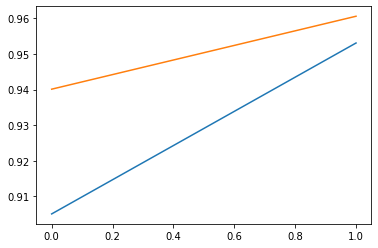

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.epoch, history.history['sparse_categorical_accuracy'])
plt.plot(history.epoch, history.history['val_sparse_categorical_accuracy'])
plt.show()

In [8]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
79/79 [==============================] - 0s 2ms/step - loss: 0.1390 - sparse_categorical_accuracy: 0.9556
test loss, test acc: [0.13897110521793365, 0.9556000232696533]
Generate predictions for 3 samples
predictions shape: (3, 10)


In [9]:
print(predictions)

[[7.6412703e-05 5.8138090e-07 1.4582126e-03 4.7822046e-04 3.9080511e-08
  7.3235301e-06 9.8905657e-09 9.9788314e-01 1.4749056e-05 8.1348189e-05]
 [4.8763292e-07 5.6661593e-05 9.9980813e-01 7.7779114e-05 2.7898666e-12
  4.7974258e-06 1.0913947e-06 1.8326316e-09 5.1121035e-05 1.8247679e-11]
 [8.3738441e-06 9.9281776e-01 1.3253826e-03 3.5892497e-04 1.1644357e-04
  2.3902330e-04 8.4938663e-05 3.0010862e-03 1.9450814e-03 1.0284962e-04]]


#### The compile() method: specifying a loss, metrics, and an optimizer

In [10]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

If your model has multiple outputs, you can specify different losses and metrics for each output, and you can modulate the contribution of each output to the total loss of the model. You will find more details about this in the section "Passing data to multi-input, multi-output models".

In [11]:
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

In [12]:
def get_uncompiled_model():
    inputs = keras.Input(shape=(784,), name="digits")
    x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
    x = layers.Dense(64, activation="relu", name="dense_2")(x)
    outputs = layers.Dense(10, activation="softmax", name="predictions")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


def get_compiled_model():
    model = get_uncompiled_model()
    model.compile(
        optimizer="rmsprop",
        loss="sparse_categorical_crossentropy",
        metrics=["sparse_categorical_accuracy"],
    )
    return model


Many built-in optimizers, losses, and metrics are available

In general, you won't have to create from scratch your own losses, metrics, or optimizers, because what you need is likely already part of the Keras API:

Optimizers:

> SGD() (with or without momentum)

> RMSprop()

> Adam()

etc.


Losses:

> MeanSquaredError()

> KLDivergence()

> CosineSimilarity()

etc.


Metrics:

> AUC()

> Precision()

> Recall()

etc.


Custom losses

Creates a function that accepts inputs y_true and y_pred

In [14]:
def custom_mean_squared_error(y_true, y_pred):
    return tf.math.reduce_mean(tf.abs(y_true - y_pred))


model = get_uncompiled_model()
model.compile(optimizer=keras.optimizers.Adam(), loss=custom_mean_squared_error)

# We need to one-hot encode the labels to use MSE
y_train_one_hot = tf.one_hot(y_train, depth=10)
model.fit(x_train, y_train_one_hot, batch_size=64, epochs=1)

782/782 [==============================] - 2s 2ms/step - loss: 0.0336


Let's say you want to use mean squared error, but with an added term that will de-incentivize prediction values far from 0.5 (we assume that the categorical targets are one-hot encoded and take values between 0 and 1). This creates an incentive for the model not to be too confident, which may help reduce overfitting (we won't know if it works until we try!).

In [15]:
class CustomMSE(keras.losses.Loss):
    def __init__(self, regularization_factor=0.1, name="custom_mse"):
        super().__init__(name=name)
        self.regularization_factor = regularization_factor

    def call(self, y_true, y_pred):
        mse = tf.math.reduce_mean(tf.square(y_true - y_pred))
        reg = tf.math.reduce_mean(tf.square(0.5 - y_pred))
        return mse + reg * self.regularization_factor


model = get_uncompiled_model()
model.compile(optimizer=keras.optimizers.Adam(), loss=CustomMSE())

y_train_one_hot = tf.one_hot(y_train, depth=10)
model.fit(x_train, y_train_one_hot, batch_size=64, epochs=1)

782/782 [==============================] - 2s 2ms/step - loss: 0.0387


Custom metrics

In [16]:
class CategoricalTruePositives(keras.metrics.Metric):
    def __init__(self, name="categorical_true_positives", **kwargs):
        super(CategoricalTruePositives, self).__init__(name=name, **kwargs)
        self.true_positives = self.add_weight(name="ctp", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.reshape(tf.argmax(y_pred, axis=1), shape=(-1, 1))
        values = tf.cast(y_true, "int32") == tf.cast(y_pred, "int32")
        values = tf.cast(values, "float32")
        if sample_weight is not None:
            sample_weight = tf.cast(sample_weight, "float32")
            values = tf.multiply(values, sample_weight)
        self.true_positives.assign_add(tf.reduce_sum(values))

    def result(self):
        return self.true_positives

    def reset_states(self):
        # The state of the metric will be reset at the start of each epoch.
        self.true_positives.assign(0.0)


model = get_uncompiled_model()
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[CategoricalTruePositives()],
)
model.fit(x_train, y_train, batch_size=64, epochs=3)

Epoch 1/3
782/782 [==============================] - 2s 2ms/step - loss: 0.3393 - categorical_true_positives: 45189.0000
Epoch 2/3
782/782 [==============================] - 2s 2ms/step - loss: 0.1528 - categorical_true_positives: 47729.0000
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.1129 - categorical_true_positives: 48298.0000


In [17]:
model = get_compiled_model()
model.fit(x_train, y_train, batch_size=64, validation_split=0.2, epochs=1)

625/625 [==============================] - 2s 3ms/step - loss: 0.3716 - sparse_categorical_accuracy: 0.8952 - val_loss: 0.2271 - val_sparse_categorical_accuracy: 0.9307


In [18]:
model = get_compiled_model()

# First, let's create a training Dataset instance.
# For the sake of our example, we'll use the same MNIST data as before.
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# Shuffle and slice the dataset.
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

# Now we get a test dataset.
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(64)

# Since the dataset already takes care of batching,
# we don't pass a `batch_size` argument.
model.fit(train_dataset, epochs=3)

# You can also evaluate or predict on a dataset.
print("Evaluate")
result = model.evaluate(test_dataset)
dict(zip(model.metrics_names, result))

Epoch 1/3
782/782 [==============================] - 2s 3ms/step - loss: 0.3355 - sparse_categorical_accuracy: 0.9053
Epoch 2/3
782/782 [==============================] - 2s 3ms/step - loss: 0.1620 - sparse_categorical_accuracy: 0.9520
Epoch 3/3
782/782 [==============================] - 2s 3ms/step - loss: 0.1180 - sparse_categorical_accuracy: 0.9645
Evaluate
157/157 [==============================] - 0s 2ms/step - loss: 0.1217 - sparse_categorical_accuracy: 0.9634


{'loss': 0.12170809507369995,
 'sparse_categorical_accuracy': 0.9634000062942505}

In [19]:
model = get_compiled_model()

# Prepare the training dataset
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

# Only use the 100 batches per epoch (that's 64 * 100 samples)
model.fit(train_dataset, epochs=3, steps_per_epoch=100)


Epoch 1/3
100/100 [==============================] - 0s 2ms/step - loss: 0.7720 - sparse_categorical_accuracy: 0.7891
Epoch 2/3
100/100 [==============================] - 0s 2ms/step - loss: 0.3756 - sparse_categorical_accuracy: 0.8880
Epoch 3/3
100/100 [==============================] - 0s 2ms/step - loss: 0.3242 - sparse_categorical_accuracy: 0.9016


#### Using a validation 

In [20]:
model = get_compiled_model()

# Prepare the training dataset
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

# Prepare the validation dataset
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.batch(64)

model.fit(train_dataset, epochs=1, validation_data=val_dataset)

782/782 [==============================] - 2s 3ms/step - loss: 0.3322 - sparse_categorical_accuracy: 0.9066 - val_loss: 0.1811 - val_sparse_categorical_accuracy: 0.9472


If you want to run validation only on a specific number of batches from this dataset, you can pass the validation_steps argument, which specifies how many validation steps the model should run with the validation dataset before interrupting validation and moving on to the next epoch:



In [21]:
model = get_compiled_model()

# Prepare the training dataset
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

# Prepare the validation dataset
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.batch(64)

model.fit(
    train_dataset,
    epochs=1,
    # Only run validation using the first 10 batches of the dataset
    # using the `validation_steps` argument
    validation_data=val_dataset,
    validation_steps=10,
)

782/782 [==============================] - 2s 3ms/step - loss: 0.3287 - sparse_categorical_accuracy: 0.9067 - val_loss: 0.3179 - val_sparse_categorical_accuracy: 0.9234


#### Passing data to multi-input, multi-output models

In [22]:
image_input = keras.Input(shape=(32, 32, 3), name="img_input")
timeseries_input = keras.Input(shape=(None, 10), name="ts_input")

x1 = layers.Conv2D(3, 3)(image_input)
x1 = layers.GlobalMaxPooling2D()(x1)

x2 = layers.Conv1D(3, 3)(timeseries_input)
x2 = layers.GlobalMaxPooling1D()(x2)

x = layers.concatenate([x1, x2])

score_output = layers.Dense(1, name="score_output")(x)
class_output = layers.Dense(5, activation="softmax", name="class_output")(x)

model = keras.Model(
    inputs=[image_input, timeseries_input], outputs=[score_output, class_output]
)

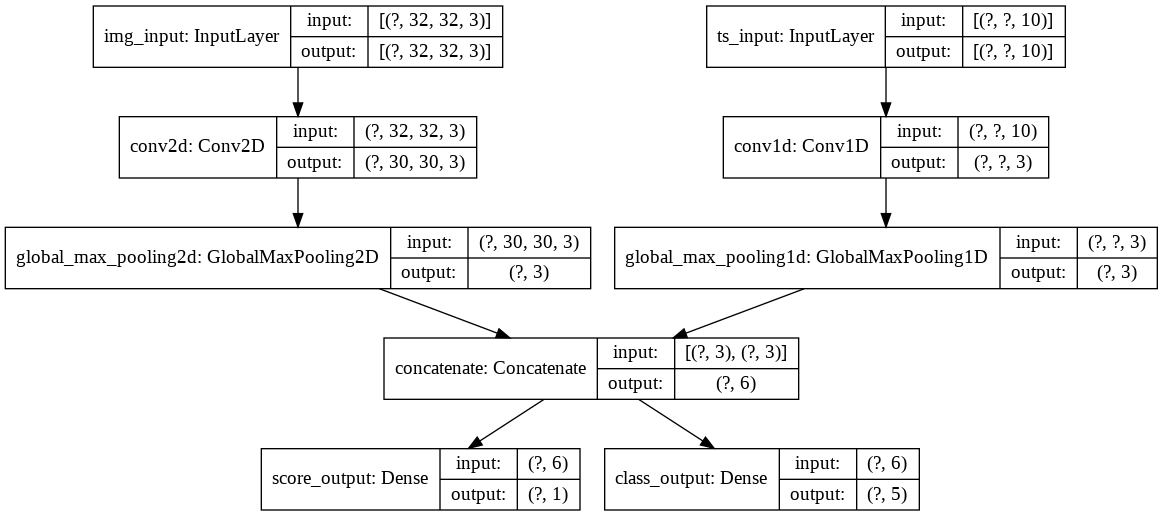

In [23]:
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [24]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=[keras.losses.MeanSquaredError(), keras.losses.CategoricalCrossentropy()],
)

In [25]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=[keras.losses.MeanSquaredError(), keras.losses.CategoricalCrossentropy()],
    metrics=[
        [
            keras.metrics.MeanAbsolutePercentageError(),
            keras.metrics.MeanAbsoluteError(),
        ],
        [keras.metrics.CategoricalAccuracy()],
    ],
)

In [26]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss={
        "score_output": keras.losses.MeanSquaredError(),
        "class_output": keras.losses.CategoricalCrossentropy(),
    },
    metrics={
        "score_output": [
            keras.metrics.MeanAbsolutePercentageError(),
            keras.metrics.MeanAbsoluteError(),
        ],
        "class_output": [keras.metrics.CategoricalAccuracy()],
    },
)


It's possible to give different weights to different output-specific losses (for instance, one might wish to privilege the "score" loss in our example, by giving to 2x the importance of the class loss), using the loss_weights argument:



In [27]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss={
        "score_output": keras.losses.MeanSquaredError(),
        "class_output": keras.losses.CategoricalCrossentropy(),
    },
    metrics={
        "score_output": [
            keras.metrics.MeanAbsolutePercentageError(),
            keras.metrics.MeanAbsoluteError(),
        ],
        "class_output": [keras.metrics.CategoricalAccuracy()],
    },
    loss_weights={"score_output": 2.0, "class_output": 1.0},
)

In [29]:
import numpy as np

In [30]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=[keras.losses.MeanSquaredError(), keras.losses.CategoricalCrossentropy()],
)

# Generate dummy NumPy data
img_data = np.random.random_sample(size=(100, 32, 32, 3))
ts_data = np.random.random_sample(size=(100, 20, 10))
score_targets = np.random.random_sample(size=(100, 1))
class_targets = np.random.random_sample(size=(100, 5))

# Fit on lists
model.fit([img_data, ts_data], [score_targets, class_targets], batch_size=32, epochs=1)

# Alternatively, fit on dicts
model.fit(
    {"img_input": img_data, "ts_input": ts_data},
    {"score_output": score_targets, "class_output": class_targets},
    batch_size=32,
    epochs=1,
)

4/4 [==============================] - 0s 9ms/step - loss: 6.0738 - score_output_loss: 0.4856 - class_output_loss: 5.5882


In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices(
    (
        {"img_input": img_data, "ts_input": ts_data},
        {"score_output": score_targets, "class_output": class_targets},
    )
)
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

model.fit(train_dataset, epochs=1)


#### Using callbacks

In [31]:
model = get_compiled_model()

callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-2,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=2,
        verbose=1,
    )
]
model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=64,
    callbacks=callbacks,
    validation_split=0.2,
)

Epoch 1/20
625/625 [==============================] - 2s 4ms/step - loss: 0.3706 - sparse_categorical_accuracy: 0.8968 - val_loss: 0.2578 - val_sparse_categorical_accuracy: 0.9221
Epoch 2/20
625/625 [==============================] - 2s 3ms/step - loss: 0.1788 - sparse_categorical_accuracy: 0.9474 - val_loss: 0.1962 - val_sparse_categorical_accuracy: 0.9427
Epoch 3/20
625/625 [==============================] - 2s 3ms/step - loss: 0.1324 - sparse_categorical_accuracy: 0.9607 - val_loss: 0.1609 - val_sparse_categorical_accuracy: 0.9521
Epoch 4/20
625/625 [==============================] - 2s 3ms/step - loss: 0.1036 - sparse_categorical_accuracy: 0.9682 - val_loss: 0.1468 - val_sparse_categorical_accuracy: 0.9584
Epoch 5/20
625/625 [==============================] - 2s 3ms/step - loss: 0.0862 - sparse_categorical_accuracy: 0.9746 - val_loss: 0.1351 - val_sparse_categorical_accuracy: 0.9611
Epoch 6/20
625/625 [==============================] - 2s 3ms/step - loss: 0.0720 - sparse_categorica

#### Many built-in callbacks are available

> ModelCheckpoint: Periodically save the model.

> EarlyStopping: Stop training when training is no longer improving the validation metrics.

> TensorBoard: periodically write model logs that can be visualized in TensorBoard (more details in the section "Visualization").

> CSVLogger: streams loss and metrics data to a CSV file.
etc.


Custom callbacks

In [32]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

In [33]:
model = get_compiled_model()

callbacks = [
    keras.callbacks.ModelCheckpoint(
        # Path where to save the model
        # The two parameters below mean that we will overwrite
        # the current checkpoint if and only if
        # the `val_loss` score has improved.
        # The saved model name will include the current epoch.
        filepath="mymodel_{epoch}",
        save_best_only=True,  # Only save a model if `val_loss` has improved.
        monitor="val_loss",
        verbose=1,
    )
]
model.fit(
    x_train, y_train, epochs=2, batch_size=64, callbacks=callbacks, validation_split=0.2
)

Epoch 1/2
614/625 [============================>.] - ETA: 0s - loss: 0.3679 - sparse_categorical_accuracy: 0.8964
Epoch 00001: val_loss improved from inf to 0.23957, saving model to mymodel_1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: mymodel_1/assets
625/625 [==============================] - 2s 4ms/step - loss: 0.3650 - sparse_categorical_accuracy: 0.8972 - val_loss: 0.2396 - val_sparse_categorical_accuracy: 0.9271
Epoch 2/2
621/625 [============================>.] - ETA: 0s - loss: 0.1737 - sparse_categorical_accuracy: 0.9493
Epoch 00002: val_loss improved from 0.23957 to 0.18014, saving model to mymodel_2
INFO:tensorflow:Assets written to: mymodel_2/assets
625/625 [==============================] - 2s 3ms/step - loss: 0.1736 - sparse_categorical_accuracy: 0.9493 - val_loss: 0.1801 - val_sparse_categorical_accuracy: 0.9444


The ModelCheckpoint callback can be used to implement fault-tolerance: the ability to restart training from the last saved state of the model in case training gets randomly interrupted. Here's a basic example:

In [35]:
import os

# Prepare a directory to store all the checkpoints.
checkpoint_dir = "./ckpt"
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)


def make_or_restore_model():
    # Either restore the latest model, or create a fresh one
    # if there is no checkpoint available.
    checkpoints = [checkpoint_dir + "/" + name for name in os.listdir(checkpoint_dir)]
    if checkpoints:
        latest_checkpoint = max(checkpoints, key=os.path.getctime)
        print("Restoring from", latest_checkpoint)
        return keras.models.load_model(latest_checkpoint)
    print("Creating a new model")
    return get_compiled_model()


model = make_or_restore_model()
callbacks = [
    # This callback saves a SavedModel every 100 batches.
    # We include the training loss in the saved model name.
    keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_dir + "/ckpt-loss={loss:.2f}", save_freq=100
    )
]
model.fit(x_train, y_train, epochs=1, callbacks=callbacks)

Restoring from ./ckpt/ckpt-loss=0.31
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1483 - sparse_categorical_accuracy: 0.9560


Using learning rate schedules

In [36]:
initial_learning_rate = 0.1
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)

optimizer = keras.optimizers.RMSprop(learning_rate=lr_schedule)

Several built-in schedules are available: ExponentialDecay, PiecewiseConstantDecay, PolynomialDecay, and InverseTimeDecay.

In [ ]:
!tensorboard --logdir=/full_path_to_your_logs

In [38]:
keras.callbacks.TensorBoard(
    log_dir="/full_path_to_your_logs",
    histogram_freq=0,  # How often to log histogram visualizations
    embeddings_freq=0,  # How often to log embedding visualizations
    update_freq="epoch",
)  # How often to write logs (default: once per epoch)
